In [ ]:

# use for testing purpose
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy
import os
import sklearn.metrics
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

from google.colab.patches import cv2_imshow

In [ ]:
img_dir='/content/drive/MyDrive/cropped1/train'
c=[]
count=0
for file in os.listdir(img_dir):
  c.append(file)
  # if(file.exist()):
    # c[file]=count
    # count=count+1}
    # print(type(file))
print(c)
len(c)

['salmankhan', 'sharukhkhan', 'akshaykumar']


3

In [ ]:
def get_images(directory):

  Images=[]
  Labels=[]
  label=0

  for labels in os.listdir(directory):


    for i in range(0,len(c)):


      if labels==c[i]:

        label=i
      
      
    for image_file in os.listdir(directory+labels): 
      try:
        image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
        image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
        Images.append(image)
        Labels.append(label)
      except:
        break
  return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

      


In [ ]:
test_images,test_labels = get_images('/content/drive/MyDrive/cropped1/test/')



In [ ]:
test_images
len(test_images)

298

In [ ]:
test=np.array(test_images)

In [ ]:
import tensorflow as tf
model1 = tf.keras.models.load_model('/content/drive/MyDrive/cropped1/31may.h5')
print('loaded succesfully')

loaded succesfully


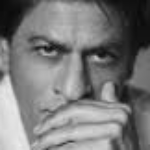

sharukhkhan


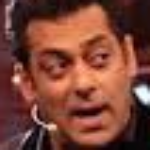

salmankhan


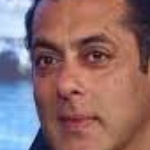

salmankhan


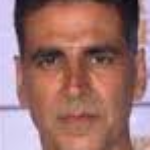

akshaykumar


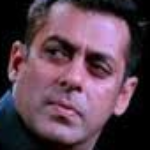

salmankhan


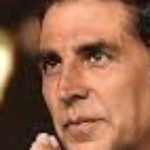

KeyboardInterrupt: ignored

In [ ]:

import cv2
from google.colab.patches import cv2_imshow

for i in range(len(test_images)):
  cv2_imshow(test_images[i])
  ans=c[(np.argmax(model1.predict(test)[i]))]
  print(ans)


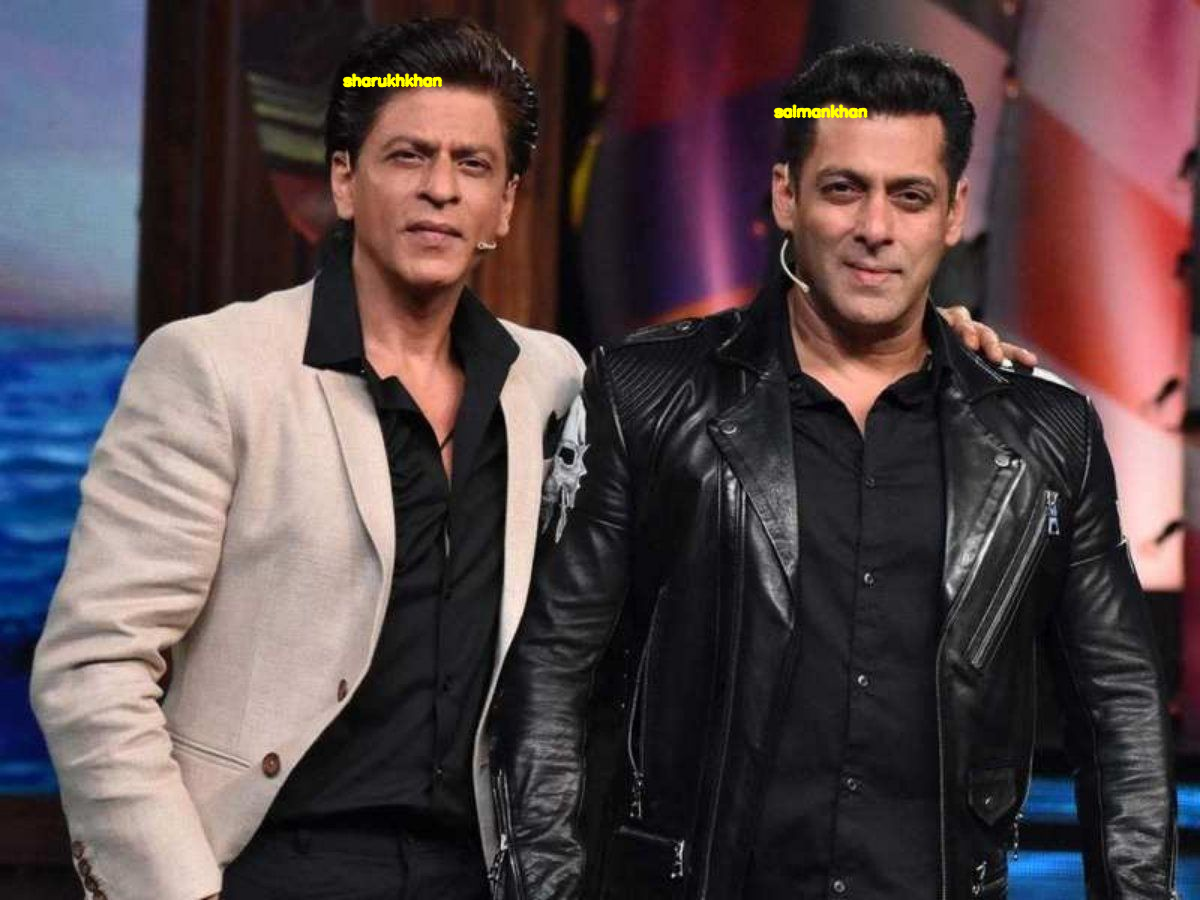

In [ ]:



#for testing more than 1 photo  in 1 image

# for whole body to extract face and then classify

import cv2
from google.colab.patches import cv2_imshow

face_cascade=cv2.CascadeClassifier('/content/drive/MyDrive/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('/content/drive/MyDrive/haarcascade_eye.xml')
img=cv2.imread('/content/drive/MyDrive/cropped1/both.jpg')

gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30)
        )       
# print(faces.shape)
# org=(x,y)
x=150
y=100
org=(x,y)
# all=[]
for (x, y, w, h) in faces:
            # ans=cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), thickness=2)
            roi = img[y:y+h,x:x+w]
            im=cv2.resize(roi,(150,150))
            roi_gray=cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if(len(eyes)>=1):

              normalized_img=im/255.0
              reshaped=np.reshape(im,(1,150,150,3))
            
              ans=c[np.argmax(model1.predict(reshaped))]
              # all.append(ans)
              # print(all)
            
              image = cv2.putText(img, ans,(x,y), cv2.FONT_HERSHEY_SIMPLEX, 
                   0.5, (0,255,255), 2, cv2.LINE_AA)
              
              x=x+100
              y=y+50
              # cv2_imshow(im)

            
cv2_imshow(image)












In [ ]:
# for testing the video
import cv2
from google.colab.patches import cv2_imshow

face_cascade=cv2.CascadeClassifier('/content/drive/MyDrive/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('/content/drive/MyDrive/haarcascade_eye.xml')
cap=cv2.VideoCapture('/content/drive/MyDrive/cropped1/InShot_20210531_115920436.mp4')
ret,frame=cap.read()
cap.set(cv2.CAP_PROP_FPS, 60) 


while ret:

    
    ret,frame=cap.read()
    cv2.waitKey(0)

    gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(30, 30)
            )       
# print(faces.shape)

    x=30
    y=30
# all=[]
    for (x, y, w, h) in faces:

            # ans=cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), thickness=2)
                roi = frame[y:y+h,x:x+w]
                im=cv2.resize(roi,(150,150))
                roi_gray=cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
                eyes = eye_cascade.detectMultiScale(roi_gray)
                if(len(eyes)>=1):

                  normalized_img=im/255.0
                  reshaped=np.reshape(im,(1,150,150,3))
            
                  ans=c[np.argmax(model.predict(reshaped))]
              # all.append(ans)
              # print(all)
            
                  image = cv2.putText(im, ans,(x,y), cv2.FONT_HERSHEY_SIMPLEX, 
                       0.7, (0,255,0), 2, cv2.LINE_AA)
              # x=x+5
              # y=y+2

            
                  cv2_imshow(image)
                  print(ans)









